In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
data = pd.read_csv("C:/Users/tejas/Downloads/water_quality_potability.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.160466,195.712338,22636.785632,7.235746,336.794067,424.396711,14.376178,68.105888,3.991681,1
1,7.187738,193.202237,21263.028076,7.117409,333.997161,430.163405,14.206928,64.807703,3.957064,0
2,5.400302,140.739062,17266.593422,10.056852,328.358241,472.874073,11.256381,56.931906,4.824786,0
3,7.078913,196.886558,21539.185679,7.104867,335.223406,429.400333,14.344261,65.289765,3.909317,0
4,7.052283,194.971523,21659.468727,7.101790,335.669903,425.620822,14.100794,66.178504,3.989340,0


In [7]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [8]:
# Check for missing values
df = data.dropna()

In [9]:
from sklearn.linear_model import LogisticRegression
# Independent variable ()
X = df.drop(columns=['Potability']) 
# Dependent variable (Potability)
y = df['Potability']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


c:\Users\tejas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [10]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 0, 0], shape=(2000,))

Accuracy: 0.8215


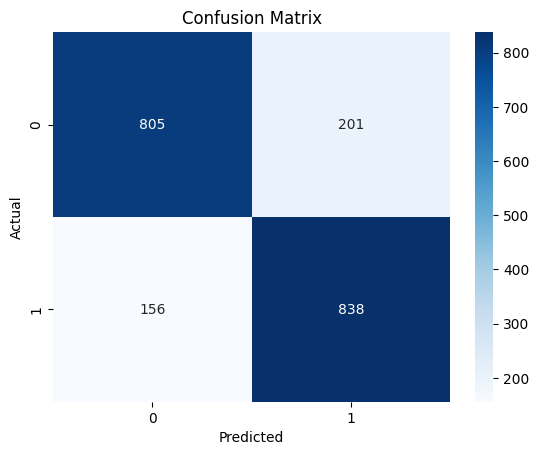

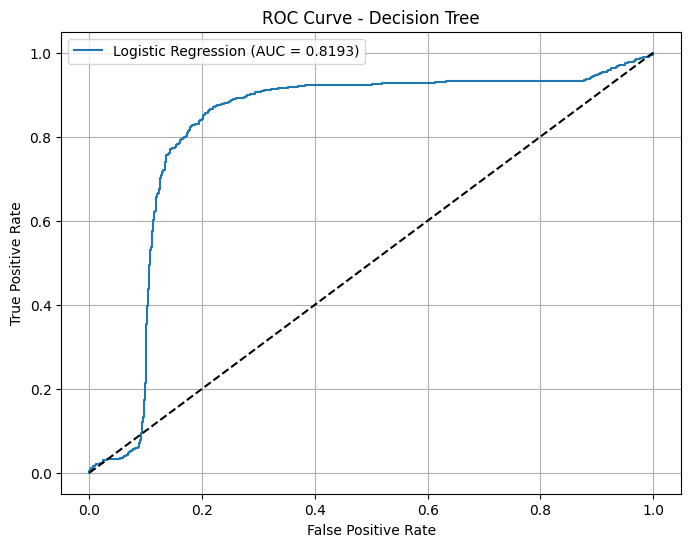

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1006
           1       0.81      0.84      0.82       994

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



In [11]:
# accuracy score
accuracy= accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0','1'], yticklabels=['0','1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import roc_curve, auc
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# ROC curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f"Logistic Regression (AUC = {roc_auc_dt:.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.grid(True)
plt.show()

print(classification_report(y_test, y_pred, target_names=['0','1']))

In [12]:
from sklearn.tree import DecisionTreeClassifier

X = df.drop(columns=['Potability'],axis = 1)
y = df['Potability'] #Target Variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
DecisionTree = DecisionTreeClassifier(max_depth=3, random_state=42)
DecisionTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [13]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 0, 0], shape=(2000,))

Accuracy: 0.8215


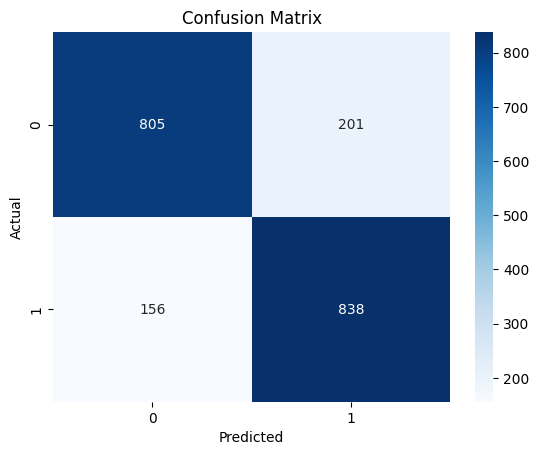

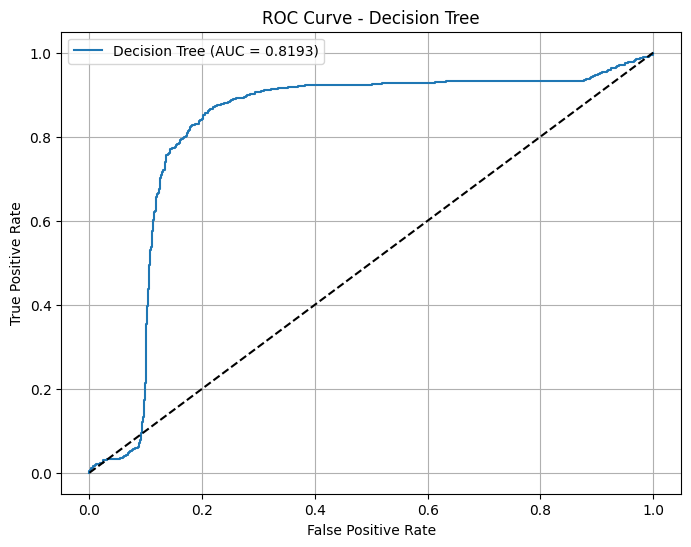

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1006
           1       0.81      0.84      0.82       994

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



In [14]:
# accuracy score
accuracy= accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0','1'], yticklabels=['0','1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import roc_curve, auc
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# ROC curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.grid(True)
plt.show()

print(classification_report(y_test, y_pred, target_names=['0','1']))

In [15]:
# KNN
# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize model
knn = KNeighborsClassifier(n_neighbors=5)

# Train
knn.fit(X_train_scaled, y_train)

# Predict
y_pred_knn = knn.predict(X_test_scaled)
y_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("KNN ROC AUC Score:", roc_auc_score(y_test, y_proba_knn))

KNN Accuracy: 0.8335
KNN Confusion Matrix:
 [[863 143]
 [190 804]]
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      1006
           1       0.85      0.81      0.83       994

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000

KNN ROC AUC Score: 0.9123268437663755


In [17]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train
rf.fit(X_train, y_train)  

# Predict
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]



Random Forest Accuracy: 0.849
Random Forest Confusion Matrix:
 [[877 129]
 [173 821]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85      1006
           1       0.86      0.83      0.84       994

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000

Random Forest ROC AUC Score: 0.933149593385362


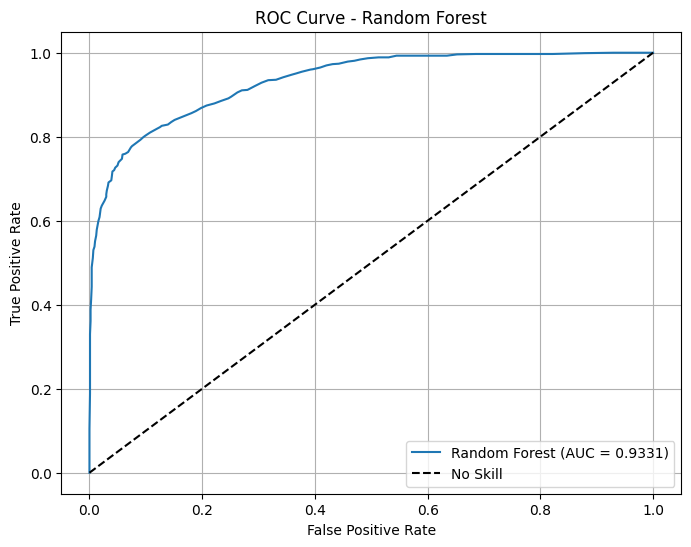

In [18]:
# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))

# ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc_rf:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [20]:
importances = rf.feature_importances_  # For RandomForest
features = X.columns  # X is your feature DataFrame

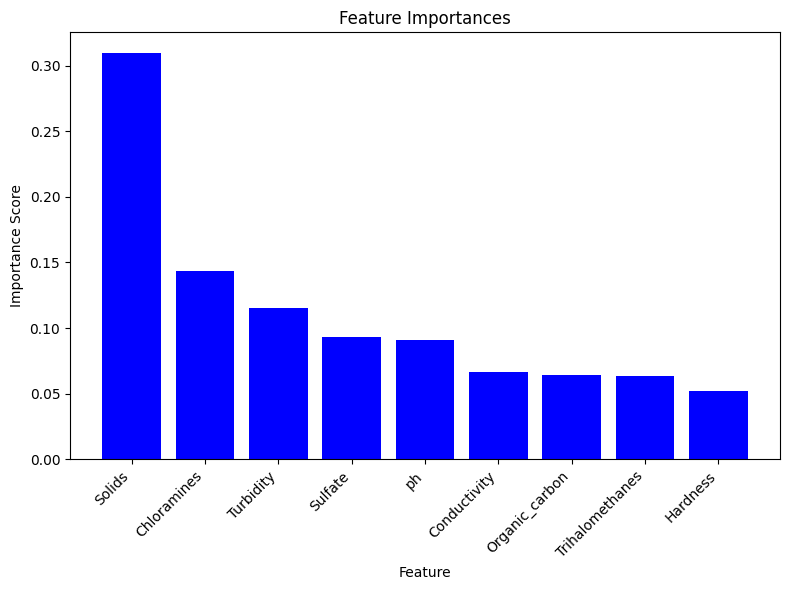

In [21]:
 #importances as a bar chart
indices = np.argsort(importances)[::-1]  # Sort descending

plt.figure(figsize=(8, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], color='b', align='center')
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()
